In [180]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')
title_fontsize = 15

In [181]:
rf = pd.read_csv('RF_Rsq_v_feat.csv', index_col=0)
rf_max = rf['R-sq'].max()
rf.head()

,R-sq,Num_of_feat
0,0.905553,85.0
1,0.904497,84.0
2,0.906393,83.0
3,0.908494,82.0
4,0.907523,81.0


In [182]:
lasso = pd.read_csv('Lasso_Rsq_v_feat.csv', index_col=0)
lasso_max = lasso['R-sq'].max()
lasso.head()

,R-sq,Num_of_feat
0,0.910582,212.0
1,0.911832,211.0
2,0.912116,210.0
3,0.912116,209.0
4,0.912120,208.0


In [183]:
gb = pd.read_csv('./gb_Rsq_v_feat.csv', index_col=0)
gb_max = gb['R2'].max()
gb.head()

,R2,features
0,0.860633,82
1,0.936764,81
2,0.933877,80
3,0.934765,79
4,0.936097,78


In [184]:
svr = pd.DataFrame({'R2': [0.6, 0.915, 0.933, 0.9406, 0.939, 0.94, 0.943, 0.9449, 0.945, 0.9424, 0.942],
                   'features': [3, 9, 20, 30, 35, 40, 45, 50, 60, 70, 82]})
svr_max = svr['R2'].max()
svr.head()

,R2,features
0,0.6000,3
1,0.9150,9
2,0.9330,20
3,0.9406,30
4,0.9390,35


In [185]:
stacked = pd.DataFrame({'R2': [0.6, 0.9, 0.9294, 0.9429, 0.944, 0.9456, 0.94316, 0.943, 0.9415],
                   'features': [3, 7, 12, 20, 30, 40, 50, 61, 82]})

stacked_max = stacked['R2'].max()
stacked.head()

,R2,features
0,0.6000,3
1,0.9000,7
2,0.9294,12
3,0.9429,20
4,0.9440,30


In [187]:
ridge = pd.read_csv('./ridge_Rsq_v_feat.csv', index_col=0)
ridge_max = ridge['R2'].max()

enet = pd.read_csv('./enet_Rsq_v_feat.csv', index_col=0)
enet_max = enet['R2'].max()

In [250]:
models = ['svr', 'enet', 'lasso', 'ridge', 'stacked', 'gb', 'rf']
model_names = ['SVR', 'Enet', 'Lasso', 'Ridge', 'Stacked', 'Gradient Boost', 'Random Forest']

list(zip(models, model_names))

[('svr', 'SVR'),
 ('enet', 'Enet'),
 ('lasso', 'Lasso'),
 ('ridge', 'Ridge'),
 ('stacked', 'Stacked'),
 ('gb', 'Gradient Boost'),
 ('rf', 'Random Forest')]

In [251]:
sns.set(rc = {'figure.figsize':(15, 7)})
sns.set_style('white')

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


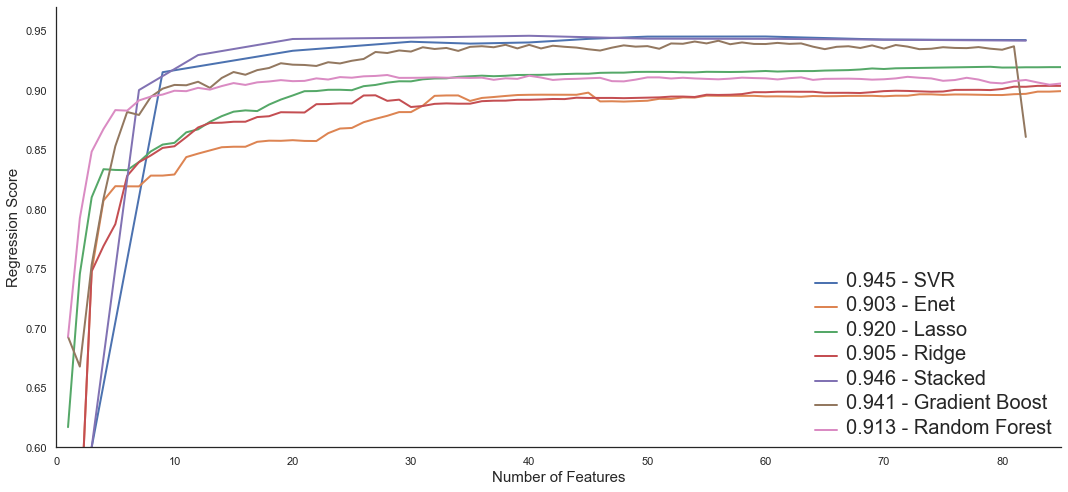

In [253]:
for model, name in list(zip(models, model_names)):
    
    R2 = globals()[f'{model}_max']
    
    if model in ['lasso']:
        label = f'0.920 - {name}'
    else:
        label = f'{round(R2, 3)} - {name}'

    fig = sns.lineplot(globals()[model].iloc[:, 1], globals()[model].iloc[:, 0], 
                       label = label, palette='husl', linewidth=2)


sns.move_legend(fig, loc = 'best', frameon = False)
sns.despine()
fig.set(xlim = (0, 85), xlabel = 'Number of Features',
        ylim = (0.6, 0.97), ylabel = 'Regression Score')
#         yticks = [0, 4e5, 8e5, 1.2e6, 1.6e6],
#         yticklabels = ['', '400K', '800K', '1.2M', ''])


# plt.title('Model Performances vs. Features', fontsize = title_fontsize, x=0)
plt.xlabel('Number of Features', fontsize = title_fontsize)
plt.ylabel('Regression Score', fontsize = title_fontsize)
# plt.legend(labels=model_names, frameon = False)

plt.setp(fig.get_legend().get_texts(), fontsize='20')
plt.tight_layout()
plt.savefig('./visualizations/Model Performances vs Features.png', dpi = 600)
plt.show()

In [316]:
models = ['stacked']
model_names = ['Stacked']

list(zip(models, model_names))

[('stacked', 'Stacked')]

In [317]:
sns.set(rc = {'figure.figsize':(8, 7)})
sns.set_style('white')

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


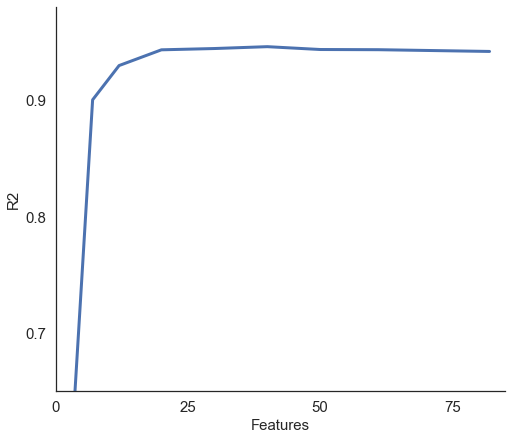

In [318]:
for model, name in list(zip(models, model_names)):
    
    R2 = globals()[f'{model}_max']

    fig = sns.lineplot(globals()[model].iloc[:, 1], globals()[model].iloc[:, 0], 
                       linewidth=3, palette='husl')
#                        label = name)


# sns.move_legend(fig, loc = 'upper left', frameon = False)
sns.despine()
fig.set(xlim = (0, 85), xlabel = 'Number of Features',
        ylim = (0.65, 0.98), ylabel = 'R2')
#         yticks = [0, 4e5, 8e5, 1.2e6, 1.6e6],
#         yticklabels = ['', '400K', '800K', '1.2M', ''])


# plt.title('Model Performances vs. Features', fontsize = title_fontsize, x=0)
plt.xlabel('Features', fontsize = title_fontsize)
plt.ylabel('R2', fontsize = title_fontsize)
plt.xticks(fontsize=title_fontsize)
plt.yticks(fontsize=title_fontsize)
sns.set(font_scale = 3)
# plt.legend(labels=model_names, frameon = False)

# plt.setp(fig.get_legend().get_texts(), fontsize='20')
plt.tight_layout()
plt.savefig(f'./visualizations/Model Performances vs Features - stacked.png')
plt.show()

/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/setone/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Num_of_feat', ylabel='R-sq'>

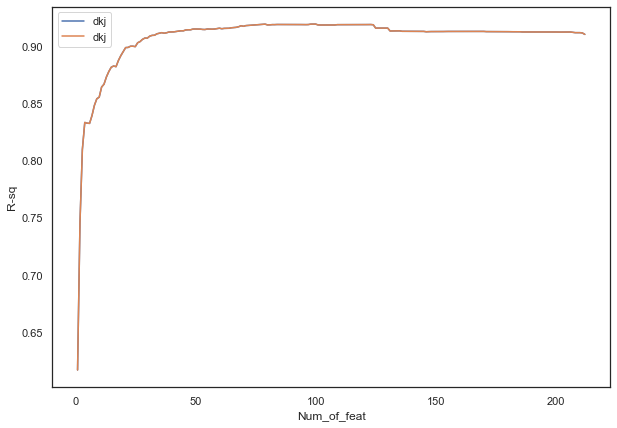

In [179]:
sns.lineplot(lasso.iloc[:, 1], lasso.iloc[:, 0], label='dkj', palette='husl')
sns.lineplot(enet.iloc[:, 1], enet.iloc[:, 0], label='dkj', palette='husl')